In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../../')

In [9]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
from os.path import join
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))
fm.findfont("serif", rebuild_if_missing=False)


import transformer_anatomy
from transformer_anatomy.utils import get_results

In [40]:
dir_path = '../../results/linear_head_wise_results'
img_save_path = '../../imgs'

pair_df = get_results(dir_path=dir_path, part='head', metrics=[])
# pair_df = pair_df.loc[pair_df['model_name'] != 'transfo-xl-wt103']
pair_df = pair_df.pivot_table(index=['model_name', 'layer', 'head'], columns='task', values='acc')
pair_df = pair_df.reset_index()

pair_df['surface'] = pair_df['WordContent'] + pair_df['Length']
pair_df['syntactic'] = (pair_df['Depth'] + pair_df['TopConstituents'] + pair_df['BigramShift']) / 3
pair_df['semantic'] = (pair_df['Tense'] + pair_df['SubjNumber'] + pair_df['ObjNumber'] + pair_df['OddManOut'] + pair_df['CoordinationInversion']) / 5

model_name_list = ['BERT-Base', 'BERT-Large', 'GPT', 'GPT2', 'ELECTRA-Small', 'ELECTRA-Base', 'ELECTRA-Large']
model_list = ['bert-base-uncased', 'bert-large-uncased', 'openai-gpt', 'gpt2', 'electra-small-discriminator', 'electra-base-discriminator', 'electra-large-discriminator']

g = sns.FacetGrid(pair_df, col="model_name",  hue="layer", col_order=model_list, col_wrap=2, palette=sns.color_palette("gist_rainbow", n_colors=24), aspect=1.3, height=2.5, legend_out=False) #viridis
g.map(plt.scatter, "syntactic", "semantic", edgecolor="w", marker='+').add_legend().fig.subplots_adjust(wspace=.05, hspace=.2)
# g.add_legend( loc=5, borderaxespad=0.)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(model_name_list[i])
g.savefig(join(img_save_path, 'fig5_syntactic_semantic.pdf'))


AttributeError: 'FacetGrid' object has no attribute 'legend'

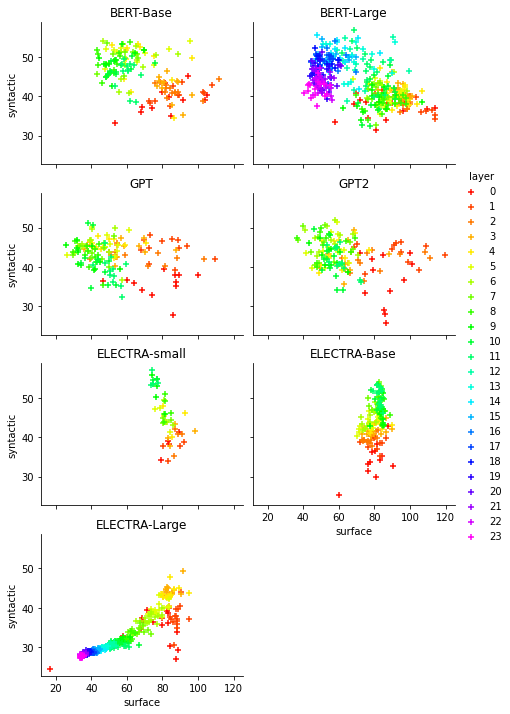

In [28]:
g = sns.FacetGrid(pair_df, col="model_name",  hue="layer", col_order=model_list, col_wrap=2, palette=sns.color_palette("gist_rainbow", n_colors=24), aspect=1.3, height=2.5) #viridis
g.map(plt.scatter, "surface", "syntactic", edgecolor="w", marker='+').add_legend().fig.subplots_adjust(wspace=.05, hspace=.2)
for i, ax in enumerate(g.axes.flat):
    ax.set_title(model_name_list[i])
g.savefig(join(img_save_path, 'fig5_surface_syntactic.pdf'))

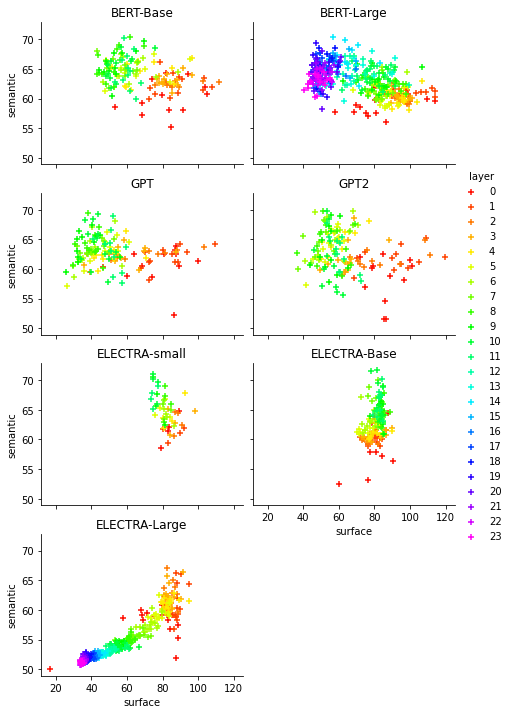

In [29]:
g = sns.FacetGrid(pair_df, col="model_name",  hue="layer", col_order=model_list, col_wrap=2, palette=sns.color_palette("gist_rainbow", n_colors=24), aspect=1.3, height=2.5) #viridis
g.map(plt.scatter, "surface", "semantic", edgecolor="w", marker='+').add_legend().fig.subplots_adjust(wspace=.05, hspace=.2)
for i, ax in enumerate(g.axes.flat):
    ax.set_title(model_name_list[i])
g.savefig(join(img_save_path, 'fig5_surface_semantic.pdf'))

In [19]:
dir_path = '../../results/ds_linear_head_wise_results'
img_save_path = '../../imgs'

pair_df = get_results(dir_path=dir_path, part='head', metrics=['pearson'])
pair_df = pair_df.loc[pair_df['model_name'] != 'transfo-xl-wt103']
pair_df = pair_df.loc[pair_df['task'] != 'TREC']
# pair_df = pair_df.loc[pair_df['task'] != 'SICKEntailment']

pair_df = pair_df.pivot_table(index=['model_name', 'layer', 'head'], columns='task', values='acc')
pair_df = pair_df.reset_index()
pair_df


task,model_name,layer,head,MRPC,SICKEntailment,SST2,SST5
0,bert-base-uncased,0,0,66.90,70.65,63.92,33.53
1,bert-base-uncased,0,1,66.32,60.46,60.85,28.42
2,bert-base-uncased,0,2,66.49,66.08,69.14,33.71
3,bert-base-uncased,0,3,68.17,70.98,68.15,35.48
4,bert-base-uncased,0,4,70.14,71.75,64.96,32.85
...,...,...,...,...,...,...,...
1339,openai-gpt,11,7,66.55,65.03,73.59,37.96
1340,openai-gpt,11,8,68.17,65.19,68.31,35.34
1341,openai-gpt,11,9,66.84,66.00,63.98,32.13
1342,openai-gpt,11,10,68.23,70.65,80.94,44.43


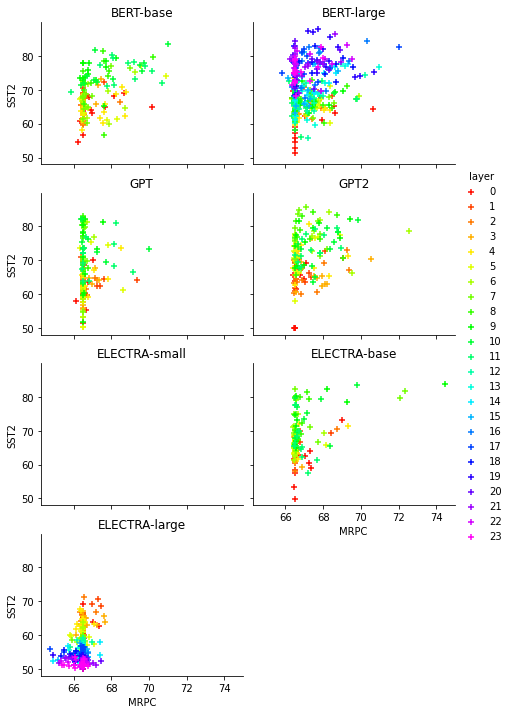

In [14]:


model_name_list = ['BERT-base', 'BERT-large', 'GPT', 'GPT2', 'ELECTRA-small', 'ELECTRA-base', 'ELECTRA-large']
model_list = ['bert-base-uncased', 'bert-large-uncased', 'openai-gpt', 'gpt2', 'electra-small-discriminator', 'electra-base-discriminator', 'electra-large-discriminator']

g = sns.FacetGrid(pair_df, col="model_name",  hue="layer", col_order=model_list, col_wrap=2, palette=sns.color_palette("gist_rainbow", n_colors=24), aspect=1.3, height=2.5) #viridis
g.map(plt.scatter, "MRPC", "SST2", edgecolor="w", marker='+').add_legend().fig.subplots_adjust(wspace=.05, hspace=.2)
for i, ax in enumerate(g.axes.flat):
    ax.set_title(model_name_list[i])
g.savefig(join(img_save_path, 'fig6_mrpc_sst2.pdf'))


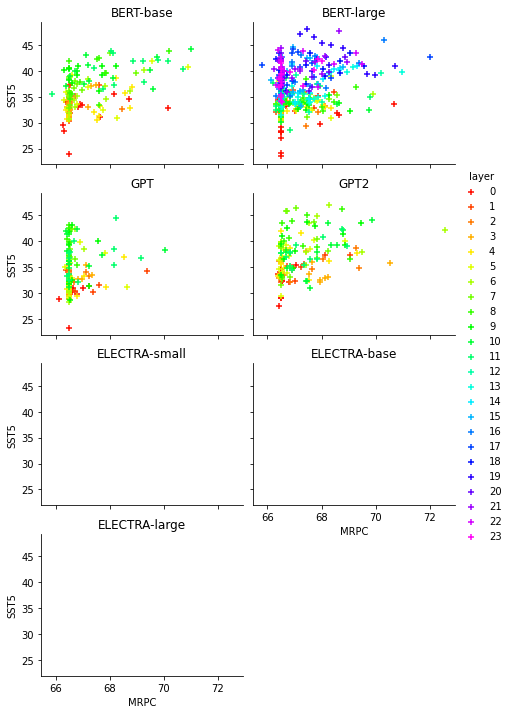

In [16]:
g = sns.FacetGrid(pair_df, col="model_name",  hue="layer", col_order=model_list, col_wrap=2, palette=sns.color_palette("gist_rainbow", n_colors=24), aspect=1.3, height=2.5) #viridis
g.map(plt.scatter, "MRPC", "SST5", edgecolor="w", marker='+').add_legend().fig.subplots_adjust(wspace=.05, hspace=.2)
for i, ax in enumerate(g.axes.flat):
    ax.set_title(model_name_list[i])
g.savefig(join(img_save_path, 'fig6_mrpc_sst2.pdf'))

In [23]:
pair_df.loc[pair_df.model_name == 'bert-base-uncased', 'layer'] = (pair_df['layer']+1) / 12.0 * 100
pair_df.loc[pair_df.model_name == 'bert-large-uncased', 'layer'] = (pair_df['layer']+1) / 24.0 * 100
pair_df.loc[pair_df.model_name == 'openai-gpt', 'layer'] = (pair_df['layer']+1) / 12.0 * 100
pair_df.loc[pair_df.model_name == 'gpt2', 'layer'] = (pair_df['layer']+1) / 12.0 * 100
pair_df.loc[pair_df.model_name == 'electra-base-discriminator', 'layer'] = (pair_df['layer']+1) / 12.0 * 100
pair_df.loc[pair_df.model_name == 'electra-small-discriminator', 'layer'] = (pair_df['layer']+1) / 12.0 * 100
pair_df.loc[pair_df.model_name == 'electra-large-discriminator', 'layer'] = (pair_df['layer']+1) / 24.0 * 100
pair_df['layer'] = pair_df['layer'].astype(int)

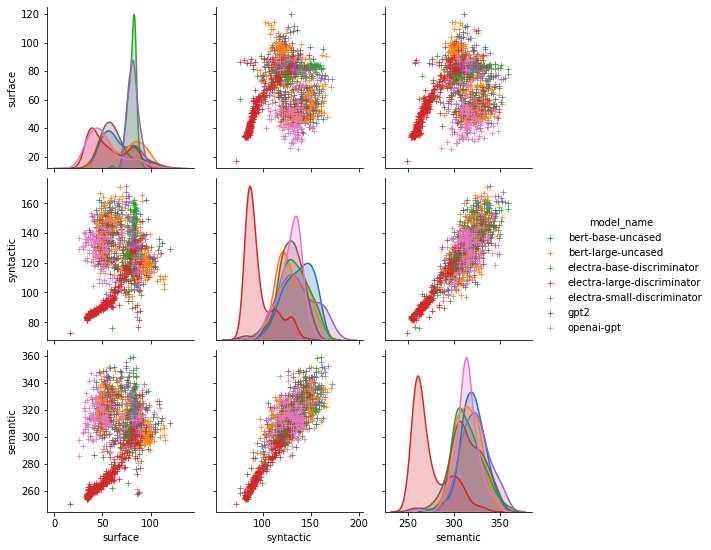

In [61]:
pair_df = pair_df.reset_index()
sns.pairplot(pair_df, hue='model_name', markers="+", vars=['surface', 'syntactic', 'semantic'])
